In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [190]:
df=pd.read_csv("flight_data.csv")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [191]:
df.shape


(10683, 11)

In [192]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [193]:
df.dropna(inplace=True)

In [194]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [196]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [197]:
#let's replace the Date_of_Journey	with journey_day and journey_month
df['journey_day']=pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.day
df['journey_month']=pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.month

In [198]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5


In [199]:
#also create dep_hour and dep_min from Dep_Time
df['dep_hour']=pd.to_datetime(df.Dep_Time).dt.hour
df['dep_min']=pd.to_datetime(df.Dep_Time).dt.minute

In [200]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50


In [201]:
df.drop(columns=['Date_of_Journey','Dep_Time'],inplace=True)

In [202]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50


In [203]:
df['arrival_hour']=pd.to_datetime(df.Arrival_Time).dt.hour
df['arrival_min']=pd.to_datetime(df.Arrival_Time).dt.minute

In [204]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [205]:
df.drop(columns=['Arrival_Time'],inplace=True)

In [206]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [207]:
duration=list(df.Duration)
len(duration)

10682

In [208]:
duration[1]

'7h 25m'

In [209]:
df['Duration'].nunique()

368

In [210]:
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+" 0m "
        elif 'm' in duration[i]:
            duration[i]=" 0h {}".format(duration[i].strip())

In [211]:
#create a seprate list for dur_hours and dur_min
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(duration[i].split()[0][:-1])
    duration_mins.append(duration[i].split()[1][:-1])

In [212]:
df['duration_hours']=duration_hours
df['duration_mins']=duration_mins

In [213]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25


In [214]:
df.drop(['Duration'],axis=1,inplace=True)

In [215]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25


In [216]:
#unique records and their frequency in airline
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [217]:
df.Airline=df.Airline.apply(lambda x: x.strip())
airline_stats=df.Airline.value_counts(ascending=False)

In [218]:
airline_less_than_10=airline_stats[airline_stats <=10]

In [219]:
df.Airline=df.Airline.apply(lambda x:'other' if x in airline_less_than_10 else x)

In [220]:
df.Airline.nunique()

10

In [221]:
df.Route.head()

0                BLR ? DEL
1    CCU ? IXR ? BBI ? BLR
2    DEL ? LKO ? BOM ? COK
3          CCU ? NAG ? BLR
4          BLR ? NAG ? DEL
Name: Route, dtype: object

In [222]:
df.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [223]:
df.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


In [224]:
df.drop(columns=['Route','Additional_Info'],inplace=True)

In [225]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25


In [226]:
df.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [227]:
df.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [228]:
df.columns


Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'journey_day', 'journey_month', 'dep_hour', 'dep_min', 'arrival_hour',
       'arrival_min', 'duration_hours', 'duration_mins'],
      dtype='object')

In [229]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25


In [231]:
dfdummies=pd.get_dummies(data=df,columns=['Airline','Source','Destination'],drop_first=True)
dfdummies.columns

Index(['Total_Stops', 'Price', 'journey_day', 'journey_month', 'dep_hour',
       'dep_min', 'arrival_hour', 'arrival_min', 'duration_hours',
       'duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_other', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [261]:
dfdummies.head(2)

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,duration_hours,duration_mins,...,Airline_other,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0


In [234]:
test=pd.read_excel('Test_set.xlsx')
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [235]:
test.shape

(2671, 10)

In [236]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [237]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [238]:
test.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info


In [239]:
test['journey_day']=pd.to_datetime(test.Date_of_Journey,format='%d/%m/%Y').dt.day
test['journey_month']=pd.to_datetime(test.Date_of_Journey,format='%d/%m/%Y').dt.month

In [240]:
test['dep_hour']=pd.to_datetime(test.Dep_Time).dt.hour
test['dep_min']=pd.to_datetime(test.Dep_Time).dt.minute

In [241]:
test.drop(columns=['Date_of_Journey','Dep_Time'],inplace=True)


In [242]:
test['arrival_hour']=pd.to_datetime(test.Arrival_Time).dt.hour
test['arrival_min']=pd.to_datetime(test.Arrival_Time).dt.minute

In [243]:
test.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,6,20,10,20


In [244]:
test.drop(columns=['Arrival_Time'],inplace=True)


In [245]:
duration=list(test.Duration)
len(duration)
test['Duration'].nunique()

320

In [246]:
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+" 0m "
        elif 'm' in duration[i]:
            duration[i]=" 0h {}".format(duration[i].strip())


In [247]:
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(duration[i].split()[0][:-1])
    duration_mins.append(duration[i].split()[1][:-1])


In [248]:
test.drop(['Duration'],axis=1,inplace=True)

In [249]:
test['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [250]:
test.Airline=test.Airline.apply(lambda x: x.strip())
airline_stats=test.Airline.value_counts(ascending=False)



In [251]:
airline_less_than_10=airline_stats[airline_stats <=10]

test.Airline=df.Airline.apply(lambda x:'other' if x in airline_less_than_10 else x)

test.Airline.nunique()

9

In [252]:
test.drop(columns=['Route','Additional_Info'],inplace=True)



In [253]:
test.Total_Stops.value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [254]:
test.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)


In [255]:
test.head()

,Airline,Source,Destination,Total_Stops,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min
0,IndiGo,Delhi,Cochin,1,6,6,17,30,4,25
1,Air India,Kolkata,Banglore,1,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0
3,IndiGo,Delhi,Cochin,1,21,5,8,0,21,0
4,IndiGo,Banglore,Delhi,0,24,6,23,55,2,45


In [256]:
dfdu=pd.get_dummies(data=test,columns=['Airline','Source','Destination'],drop_first=True)

dfdumy.shape

(2671, 24)

In [257]:
dfdumy.columns

Index(['Total_Stops', 'journey_day', 'journey_month', 'dep_hour', 'dep_min',
       'arrival_hour', 'arrival_min', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Multiple carriers',
       'Airline_SpiceJet', 'Airline_Vistara', 'Airline_other',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [258]:
dfdumy.head(2)

,Total_Stops,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Airline_other,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [263]:
x=dfdummies.drop('Price',axis=1)
y=dfdummies['Price']
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

C:\Users\91830\AppData\Local\Temp\ipykernel_8976\2262080437.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() , annot=True , cmap = 'RdYlGn')


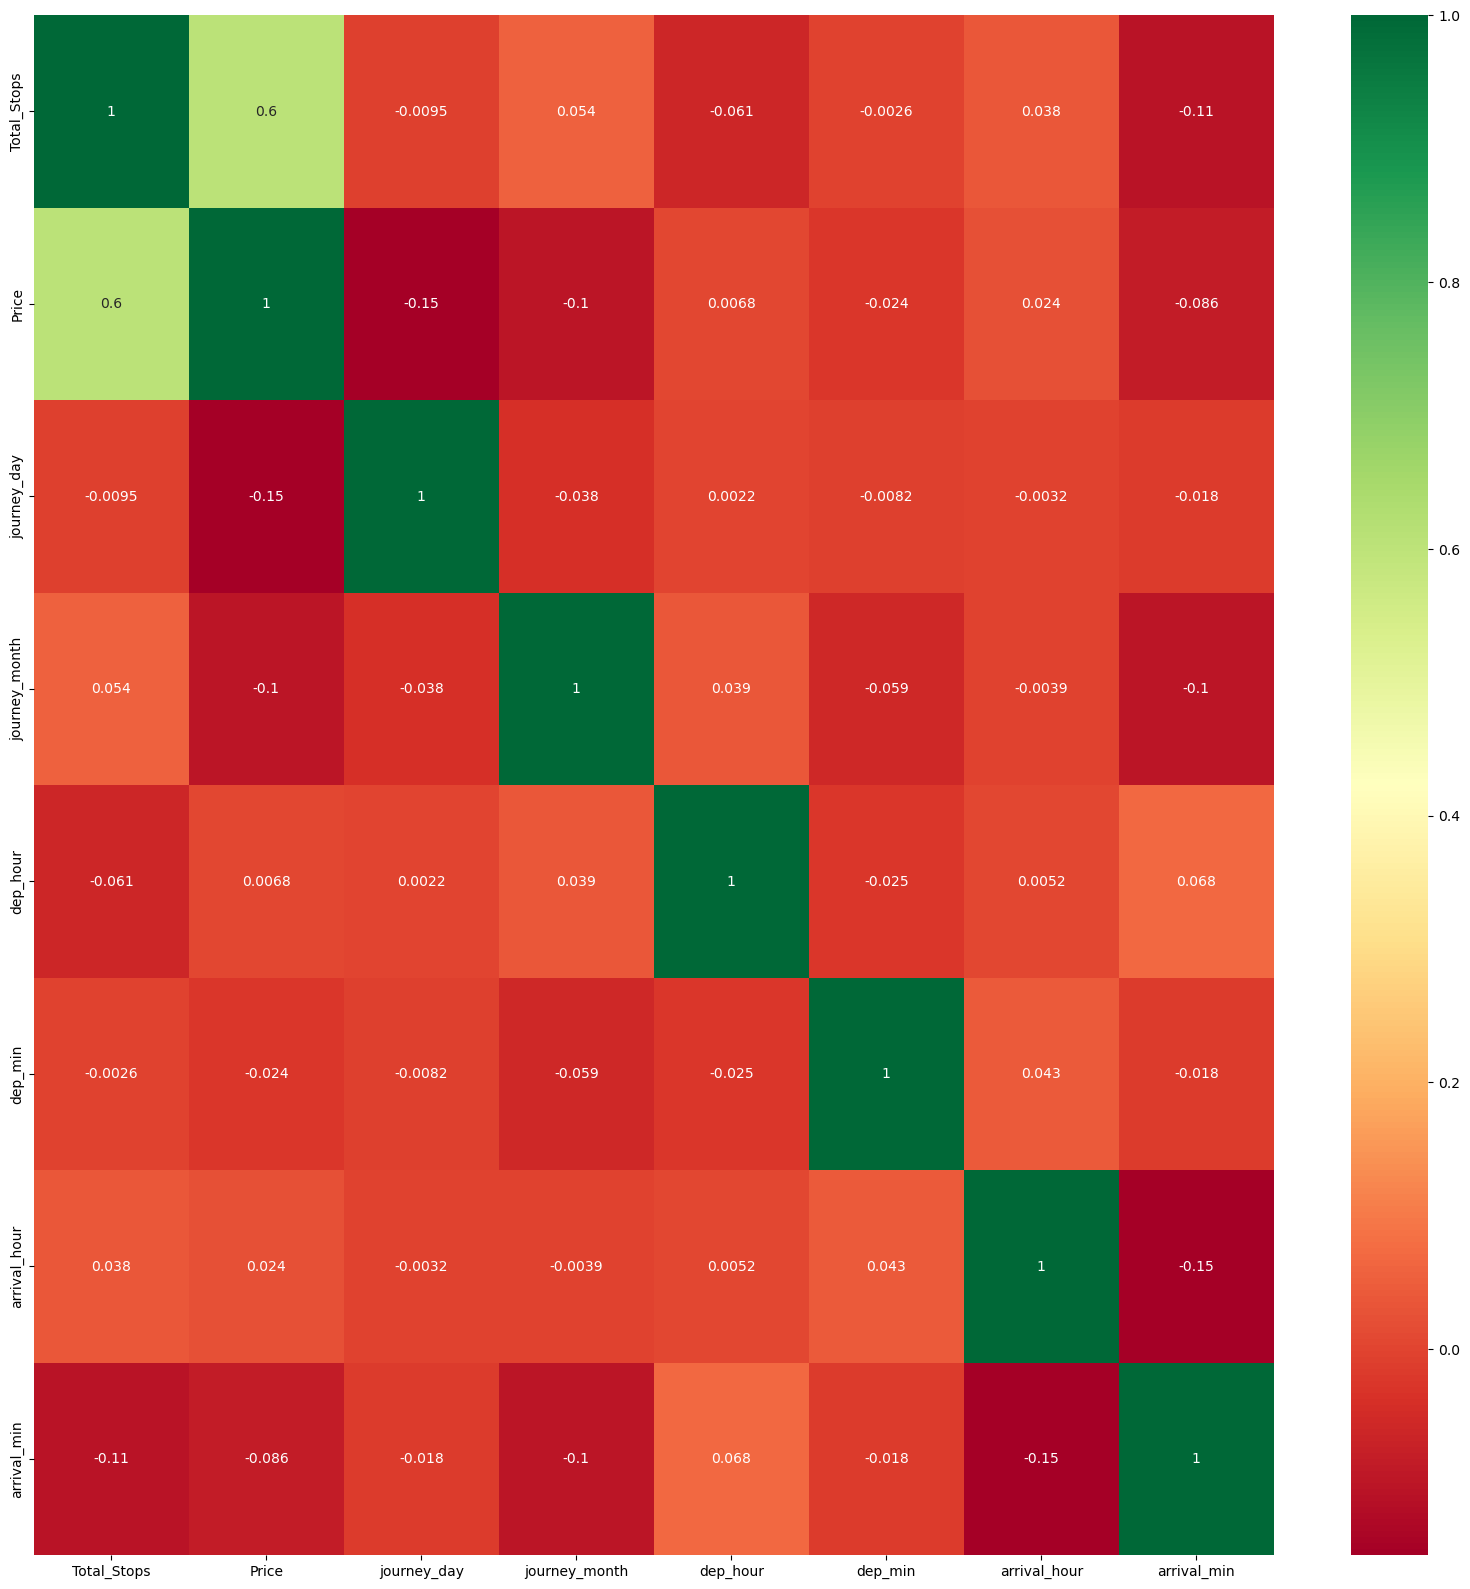

In [264]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr() , annot=True , cmap = 'RdYlGn')
plt.show()

In [260]:
dfdumy.shape

(2671, 24)

In [188]:
dfdummies.head(2)

,Total_Stops,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Airline_other,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [267]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51)

In [269]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [277]:
pred=rfr.predict(x_test)

In [278]:
rfr.score(x_train,y_train)

0.9534381692058564

In [279]:
rfr.score(x_test,y_test)

0.8291440933499941

C:\Users\91830\AppData\Local\Temp\ipykernel_8976\2485339681.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - pred)


<Axes: xlabel='Price', ylabel='Density'>

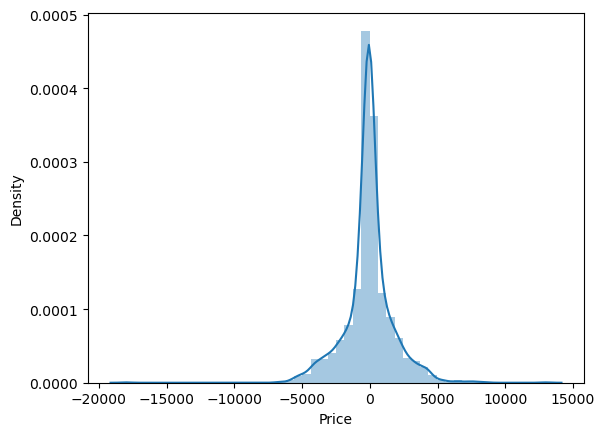

In [280]:
sns.distplot(y_test - pred)

Text(0, 0.5, 'pred')

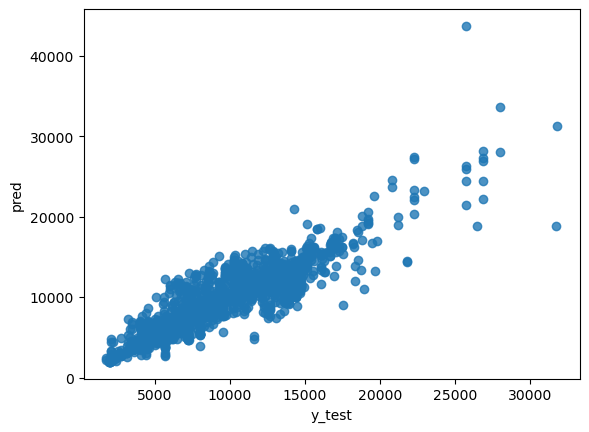

In [283]:
plt.scatter(y_test,pred,alpha=0.8)
plt.xlabel('y_test')
plt.ylabel('pred')

In [287]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 1128.3587945227455
MSE: 3202915.3294520387
RMSE: 1789.6690558458115


In [286]:
metrics.r2_score(y_test,pred)

0.8291440933499941